# Building Complex Models Using the Functional API

Let’s predict to the California housing problem and tackle it using one example of a non-sequential neural network, called **Wide & Deep neural network**.
This neural network architecture was introduced in a paper by Heng-Tze Cheng et al with title *Wide & Deep Learning for Recommender Systems*.

All parts of this section is similar to the original except for the build model part.

### Using Pandas to load the dataset
Let’s load the california housing dataset:

In [1]:
import pandas as pd

df_housing = pd.read_excel('/content/sample_data/housing_price_train.xlsx')

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,342200.0


Let’s take a look at the shape and data type of the data:

In [2]:
print('Training data shape:', df_housing.shape)
print('Training data type :', df_housing.dtypes)

Training data shape: (15323, 10)
Training data type : longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object


Based on training data, we have 15.323 data with 10 features which goes to longitude, latitude, until median_house_value.

Note that each feature is already in float64 type except for ocean_proximity. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from
text to numbers. For this, we can use Scikit-Learn’s `LabelEncoder` class:

In [3]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string data into numbers.
ocean_proximity_encoded = le.fit_transform(df_housing['ocean_proximity'])
print("ocean_proximity:",ocean_proximity_encoded[0:5])

ocean_proximity: [3 3 3 3 3]


In [4]:
df_housing['ocean_proximity'] = ocean_proximity_encoded

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,3,342200.0


In California housing, the labels are the value in median_house_value and the features, we want to take all values from longitude to median_income. Then, we need to make a list of features and the labels. Here is the feature and label names:

In [5]:
feature_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', 'ocean_proximity']
label_name = ['median_house_value']

features = df_housing[feature_names].values
label = df_housing[label_name].values

print(features.shape)
print(label.shape)

(15323, 9)
(15323, 1)


When the value range between your feature is too big, `StandardScaler` is used to resize the distribution of values. This helps us to speed up our optimization algorithm (gradient descent) and obtain a more accurate classifier.

In [6]:
from sklearn.preprocessing import MinMaxScaler

#Data Normalization
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(features)
y = scaler.fit_transform(label)

print('before scaling:\n',label[0:5])
print('after scaling:\n',y[0:5])

before scaling:
 [[452600.]
 [358500.]
 [352100.]
 [341300.]
 [342200.]]
after scaling:
 [[0.90226638]
 [0.70824656]
 [0.69505074]
 [0.67278279]
 [0.67463846]]


### Creating the deep and wide model using Functional API
Let’s build such a neural network to tackle the California housing problem:

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

input_ = layers.Input(shape=X.shape[1:])
hidden1 = layers.Dense(30, activation="relu")(input_)
hidden2 = layers.Dense(30, activation="relu")(hidden1)
concat = layers.Concatenate()([input_, hidden2])
output = layers.Dense(1)(concat)
model_1 = keras.Model(inputs=[input_], outputs=[output])

Let’s go through each line of this code:
* First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs.
* Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.
* We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
* Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the `keras.layers.concatenate()` function, which creates a
Concatenate layer and immediately calls it with the given inputs.
* Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.
* Lastly, we create a Keras Model, specifying which inputs and outputs to use.

Use `keras.utils.plot_model()` to generate an image of your model

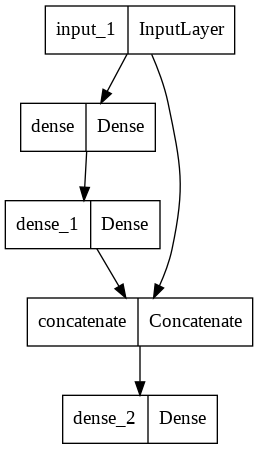

In [8]:
keras.utils.plot_model(model_1)

In [9]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           300         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 39)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

Once you have built the Keras model, everything is exactly like earlier, you must compile the model, train it, evaluate it, and use it to make predictions.

In [10]:
model_1.compile(loss="mean_squared_error", optimizer='adam')

In [11]:
history = model_1.fit(X, y, batch_size = 10, epochs = 100, 
                       callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), 
                       verbose=1, validation_split=0.25)

Epoch 1/100
1150/1150 [==============================] - 6s 5ms/step - loss: 0.0397 - val_loss: 0.0366
Epoch 2/100
1150/1150 [==============================] - 5s 4ms/step - loss: 0.0236 - val_loss: 0.0212
Epoch 3/100
1150/1150 [==============================] - 5s 4ms/step - loss: 0.0215 - val_loss: 0.0294
Epoch 4/100
1150/1150 [==============================] - 5s 4ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 5/100
1150/1150 [==============================] - 3s 3ms/step - loss: 0.0202 - val_loss: 0.0312
Epoch 6/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0199 - val_loss: 0.0220
Epoch 7/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0194 - val_loss: 0.0239
Epoch 8/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0190 - val_loss: 0.0264
Epoch 9/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0188 - val_loss: 0.0216
Epoch 10/100
1150/1150 [==============================] - 3s 2ms/step - l

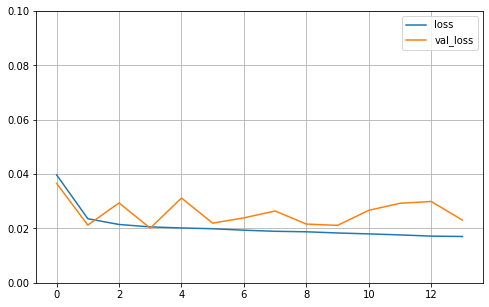

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1) # set the vertical range to [0-1]
plt.show()

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and seven features through the deep path (features 2 to 8):

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

input_A = layers.Input(shape=[5], name="wide_input")
input_B = layers.Input(shape=[7], name="deep_input")
hidden1 = layers.Dense(30, activation="relu", name="hidden_1")(input_B)
hidden2 = layers.Dense(30, activation="relu", name="hidden_2")(hidden1)
concat = layers.concatenate([input_A, hidden2], name="concat_layer")
output = layers.Dense(1, name="output")(concat)
model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output], name="model_2")

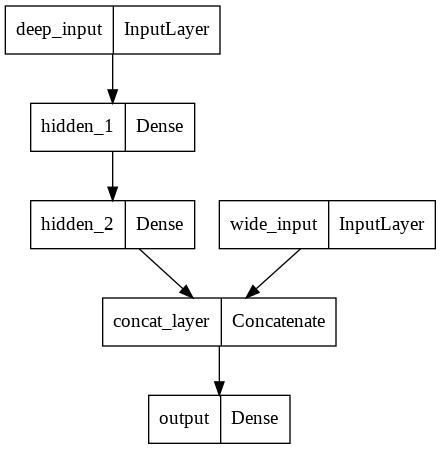

In [14]:
keras.utils.plot_model(model_2)

In [15]:
model_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 7)]          0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 30)           240         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 hidden_2 (Dense)               (None, 30)           930         ['hidden_1[0][0]']               
                                                                                            

You should name at least the most important layers, especially when the model gets a bit complex like this. Note that we specified `inputs=[input_A, input_B]` when creating the model. Now we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input
matrix X, we must pass a pair of matrices `(X_train_A, X_train_B)`: one per input. The same is true for for X_test when you call `evaluate()` or `predict()`:

In [16]:
model_2.compile(loss="mean_squared_error", optimizer='adam')

X_train_A, X_train_B = X[:, :5], X[:, 2:]
history_2 = model_2.fit((X_train_A, X_train_B), y, batch_size = 10, epochs = 100, 
                       callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), 
                       verbose=1, validation_split=0.25)

Epoch 1/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0381 - val_loss: 0.0193
Epoch 2/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0252 - val_loss: 0.0200
Epoch 3/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0233 - val_loss: 0.0273
Epoch 4/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0220 - val_loss: 0.0295
Epoch 5/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0212 - val_loss: 0.0245
Epoch 6/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0207 - val_loss: 0.0240
Epoch 7/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0200 - val_loss: 0.0268
Epoch 8/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.0198 - val_loss: 0.0228
Epoch 9/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.0195 - val_loss: 0.0188
Epoch 10/100
1150/1150 [==============================] - 3s 2ms/step - l

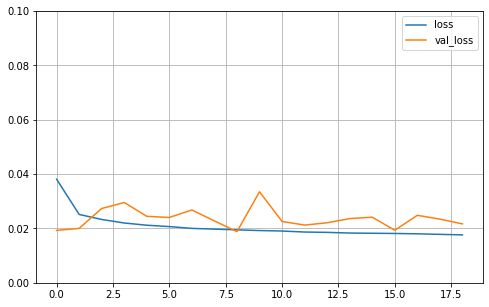

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1) # set the vertical range to [0-1]
plt.show()

Then we can compare between the `model_1` and `model_2` which better to predict the california housing dataset based on the validation loss.

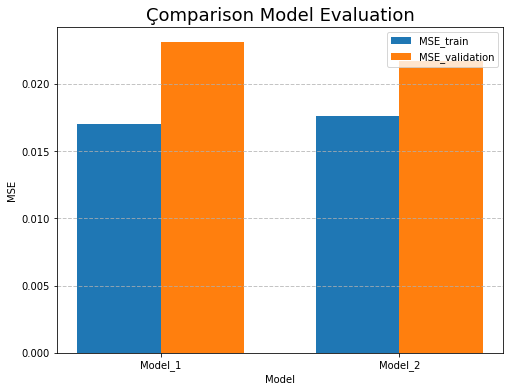

In [18]:
import numpy as np

#MSE comparison of each model
MSE_train=[history.history['loss'][-1], history_2.history['loss'][-1]]
MSE_valid=[history.history['val_loss'][-1], history_2.history['val_loss'][-1]]
kategori=['Model_1', 'Model_2']
x = np.arange(len(kategori))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x-width/2, MSE_train, width, label='MSE_train')
plt.bar(x+width/2, MSE_valid, width, label='MSE_validation')

plt.xticks(x, kategori)

plt.grid(linestyle='--',
         linewidth=1,
         axis='y',
         alpha=0.75)

plt.title('Çomparison Model Evaluation', fontsize=18)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.legend()
plt.show()

Based on the output, even `model_1` give smaller loss than `model`2, but the most important thing is the validation loss. Means that the `model_2` is more promising when we used to real data.

Once you are satisfied with your model’s validation loss, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production.

In [19]:
import pandas as pd

df_test = pd.read_excel('/content/sample_data/housing_price_test.xlsx')

df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.20,33.14,19.0,2025.0,414.0,1663.0,403.0,38147.0,<1H OCEAN,139200.0
1,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,50123.0,NEAR OCEAN,210400.0
2,-117.21,33.14,12.0,4839.0,954.0,1708.0,952.0,28586.0,<1H OCEAN,163300.0
3,-117.21,33.13,15.0,1889.0,368.0,754.0,409.0,22278.0,NEAR OCEAN,132800.0
4,-117.17,33.18,25.0,596.0,115.0,426.0,137.0,30221.0,<1H OCEAN,214300.0


In [20]:
print(df_test.shape)

(5110, 10)


In [21]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string data into numbers.
ocean_proximity_encoded = le.fit_transform(df_test['ocean_proximity'])
print("ocean_proximity:",ocean_proximity_encoded[0:5])
df_test['ocean_proximity'] = ocean_proximity_encoded
df_test.head()

ocean_proximity: [0 3 0 3 0]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.20,33.14,19.0,2025.0,414.0,1663.0,403.0,38147.0,0,139200.0
1,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,50123.0,3,210400.0
2,-117.21,33.14,12.0,4839.0,954.0,1708.0,952.0,28586.0,0,163300.0
3,-117.21,33.13,15.0,1889.0,368.0,754.0,409.0,22278.0,3,132800.0
4,-117.17,33.18,25.0,596.0,115.0,426.0,137.0,30221.0,0,214300.0


In [22]:
data_test = df_test[feature_names].values
labels_test = df_test[label_name].values

print(data_test.shape)
print(labels_test.shape)

(5110, 9)
(5110, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler

#Data Normalization
scaler = MinMaxScaler(feature_range=(0,1))
X_test = scaler.fit_transform(data_test)
y_test = scaler.fit_transform(labels_test)

print('before scaling:\n',label[0:5])
print('after scaling:\n',y[0:5])

before scaling:
 [[452600.]
 [358500.]
 [352100.]
 [341300.]
 [342200.]]
after scaling:
 [[0.90226638]
 [0.70824656]
 [0.69505074]
 [0.67278279]
 [0.67463846]]


Here will be used `model_2` as we mentioned previously

In [24]:
# Generating Predictions on testing data
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

Predictions=model_2.predict((X_test_A, X_test_B))
mse_ann_test = model_2.evaluate((X_test_A, X_test_B), y_test)
print('ANN MSE:', mse_ann_test)

160/160 [==============================] - 0s 1ms/step - loss: 0.0601
ANN MSE: 0.060100242495536804


If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to try is change another `optimizer`. If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the `batch_size argument`, which defaults to 32).

If you satisfied with the model, you should rescale the labels and the predicted value into its original form. So, you can see better visualization.

In [25]:
# Scaling the predicted and actual value Price data back to original price scale
ann_predictions = scaler.inverse_transform(Predictions)
y_test_orig = scaler.inverse_transform(y_test)

TestingData = pd.DataFrame(data=data_test, columns=feature_names)

In [26]:
TestingData['median_house_income'] = y_test_orig
TestingData['ann_predictions'] = ann_predictions
TestingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_income,ann_predictions
0,-117.20,33.14,19.0,2025.0,414.0,1663.0,403.0,38147.0,0.0,139200.0,139546.171875
1,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,50123.0,3.0,210400.0,150019.015625
2,-117.21,33.14,12.0,4839.0,954.0,1708.0,952.0,28586.0,0.0,163300.0,188899.859375
3,-117.21,33.13,15.0,1889.0,368.0,754.0,409.0,22278.0,3.0,132800.0,144819.062500
4,-117.17,33.18,25.0,596.0,115.0,426.0,137.0,30221.0,0.0,214300.0,147321.218750


We can also visualize the absolute percentage error (APE) from both predicted and actual value usng code below, then visualize it

In [27]:
import numpy as np

ann_APE = 100*(abs(TestingData['median_house_income']-TestingData['ann_predictions'])/TestingData['median_house_income'])
TestingData['ann_APE'] = ann_APE

print('The Accuracy of ANN model is: {0:.3f}'.format(100-np.mean(ann_APE)))
TestingData.head()

The Accuracy of ANN model is: 61.924


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_income,ann_predictions,ann_APE
0,-117.20,33.14,19.0,2025.0,414.0,1663.0,403.0,38147.0,0.0,139200.0,139546.171875,0.248687
1,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,50123.0,3.0,210400.0,150019.015625,28.698186
2,-117.21,33.14,12.0,4839.0,954.0,1708.0,952.0,28586.0,0.0,163300.0,188899.859375,15.676583
3,-117.21,33.13,15.0,1889.0,368.0,754.0,409.0,22278.0,3.0,132800.0,144819.062500,9.050499
4,-117.17,33.18,25.0,596.0,115.0,426.0,137.0,30221.0,0.0,214300.0,147321.218750,31.254681


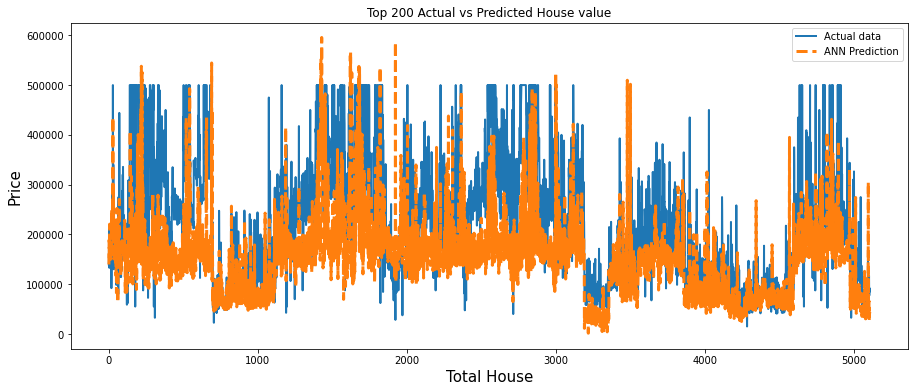

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(TestingData['median_house_income'], lw =2, ls = '-', label = 'Actual data')
plt.plot(TestingData['ann_predictions'], lw =3, ls = '--', label = 'ANN Prediction')
plt.xlabel('Total House', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Top 200 Actual vs Predicted House value')
plt.legend()